The goal of the project is to improve the customer service for a cab company in Bangalore. Company may cancel the reservation due to unavailability of cars which may cause inconvenience to passengers.

The aim of the model is to predict whether new bookings will be cancelled due to car unavailability. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv("./data/Kaggle_YourCabs_training.csv")

id - booking ID

user_id - the ID of the customer (based on mobile number)

vehicle_model_id - vehicle model type.

package_id - type of package (1=4hrs & 40kms, 2=8hrs & 80kms, 3=6hrs & 60kms, 4= 10hrs & 100kms, 5=5hrs & 50kms, 6=3hrs & 30kms, 7=12hrs & 120kms)

travel_type_id - type of travel (1=long distance, 2= point to point, 3= hourly rental).

from_area_id - unique identifier of area. Applicable only for point-to-point travel and packages

to_area_id - unique identifier of area. Applicable only for point-to-point travel

from_city_id - unique identifier of city

to_city_id - unique identifier of city (only for intercity)

from_date - time stamp of requested trip start

to_date - time stamp of trip end

online_booking - if booking was done on desktop website

mobile_site_booking - if booking was done on mobile website

booking_created - time stamp of booking

from_lat - latitude of from area

from_long - longitude of from area

to_lat - latitude of to area

to_long - longitude of to area

Car_Cancellation (available only in training data) - whether the booking was cancelled (1) or not (0) due to unavailability of a car.

Cost_of_error (available only in training data) - the cost incurred if the booking is misclassified. The cost of misclassifying an uncancelled booking as a cancelled booking (cost=1 unit). The cost associated with misclassifying a cancelled booking as uncancelled, This cost is a function of how close the cancellation occurs relative to the trip start time. The closer the trip, the higher the cost. Cancellations occurring less than 15 minutes prior to the trip start incur a fixed penalty of 100 units.

In [3]:
train.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [4]:
train.describe()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,to_date,online_booking,mobile_site_booking,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
count,43431.000000,43431.000000,43431.00000,7550.000000,43431.000000,43343.000000,34293.000000,16345.000000,1588.000000,25541.000000,43431.000000,43431.000000,43338.000000,43338.000000,34293.000000,34293.000000,43431.000000,43431.000000
mean,159206.473556,30739.198153,25.71723,2.030066,2.137252,714.544494,669.490917,14.915081,68.537783,41507.974840,0.351592,0.043241,12.982461,77.636255,13.026648,77.640595,0.072114,8.000509
std,15442.386279,10996.476709,26.79825,1.461756,0.437712,419.883553,400.638225,1.165306,49.880732,305.144945,0.477473,0.203402,0.085933,0.059391,0.113487,0.064045,0.258680,25.350698
min,132512.000000,16.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,4.000000,25569.020830,0.000000,0.000000,12.776630,77.386930,12.776630,77.386930,0.000000,0.150000
25%,145778.000000,24614.000000,12.00000,1.000000,2.000000,393.000000,393.000000,15.000000,32.000000,41480.521110,0.000000,0.000000,12.926450,77.593661,12.951850,77.582030,0.000000,1.000000
50%,159248.000000,31627.000000,12.00000,2.000000,2.000000,590.000000,541.000000,15.000000,49.000000,41517.761550,0.000000,0.000000,12.968887,77.635750,12.982750,77.645030,0.000000,1.000000
75%,172578.500000,39167.000000,24.00000,2.000000,2.000000,1089.000000,1054.000000,15.000000,108.000000,41558.914630,1.000000,0.000000,13.007750,77.688900,13.199560,77.706880,0.000000,1.000000
max,185941.000000,48730.000000,91.00000,7.000000,3.000000,1403.000000,1403.000000,31.000000,203.000000,41678.275680,1.000000,1.000000,13.366072,77.786420,13.366072,77.786420,1.000000,100.000000


In [5]:
# As you can see some of the columns are null. Find out which columns have null values
train.isnull().any(axis=0)

id                     False
user_id                False
vehicle_model_id       False
package_id              True
travel_type_id         False
from_area_id            True
to_area_id              True
from_city_id            True
to_city_id              True
from_date              False
to_date                 True
online_booking         False
mobile_site_booking    False
booking_created        False
from_lat                True
from_long               True
to_lat                  True
to_long                 True
Car_Cancellation       False
Cost_of_error          False
dtype: bool

In [6]:
# Convert all dates columns to date_time format
train['from_date'] = pd.to_datetime(train['from_date'])
train['to_date'] = pd.to_datetime(train['to_date'])
train['booking_created'] = pd.to_datetime(train['booking_created'])

#Analysis:
Would like to check if cancellations have any correlation to vehicle model, type of package, travel type, destination, booking time and distance between the starting point and destination.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113e7d810>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x106543b90>], dtype=object)

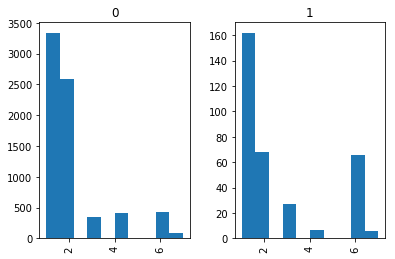

In [7]:
#Does cancellations correlate with package id (distance booked)?
train['package_id'].hist(by=train['Car_Cancellation'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110bcbed0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113fd0490>]], dtype=object)

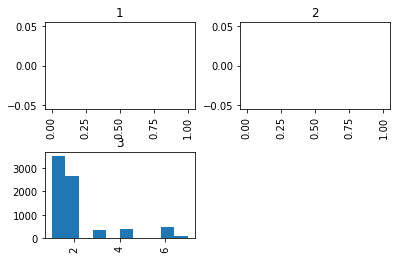

In [8]:
train['package_id'].hist(by=train['travel_type_id'])

In [9]:
by_vehicleid = train.groupby(['vehicle_model_id', 'Car_Cancellation']).size().unstack(1)
by_traveltypeid = train.groupby(['travel_type_id','Car_Cancellation']).size().unstack(1)
by_packageid = train.groupby(['package_id','Car_Cancellation']).size().unstack(1)
by_fromareaid = train.groupby(['from_area_id','Car_Cancellation']).size().unstack(1)
by_toareaid = train.groupby(['to_area_id','Car_Cancellation']).size().unstack(1)
by_fromcityid = train.groupby(['from_city_id','Car_Cancellation']).size().unstack(1)
by_tocityid = train.groupby(['to_city_id','Car_Cancellation']).size().unstack(1)
by_onlinebooking = train.groupby(['online_booking','Car_Cancellation']).size().unstack(1)
by_mobilesitebooking = train.groupby(['mobile_site_booking','Car_Cancellation']).size().unstack(1)

# As you can see certain models have high cancellation rates.

In [10]:
print(by_traveltypeid)
print(by_vehicleid.head(10))
print(by_packageid)
print(by_fromareaid)
print(by_toareaid)
print(by_fromcityid)
print(by_tocityid)
print(by_onlinebooking)
print(by_mobilesitebooking)    

Car_Cancellation      0     1
travel_type_id               
1                  1568    21
2                 31517  2775
3                  7214   336
Car_Cancellation        0       1
vehicle_model_id                 
1                     2.0     NaN
10                  104.0     NaN
12                29191.0  2668.0
13                    6.0     1.0
14                    1.0     NaN
17                   40.0     NaN
23                  297.0     NaN
24                 1491.0     3.0
28                 1626.0    76.0
30                   14.0     NaN
Car_Cancellation       0      1
package_id                     
1.0               3341.0  162.0
2.0               2583.0   68.0
3.0                348.0   27.0
4.0                405.0    7.0
5.0                  6.0    NaN
6.0                436.0   66.0
7.0                 95.0    6.0
Car_Cancellation      0     1
from_area_id                 
2.0                27.0   4.0
6.0                 7.0   NaN
15.0                6.0   NaN
16.0

In [11]:
#Check if day and time of the week has any effect on cancellations and also need to check
#if time between booking and scheduled time has any effect. Assuming closer the booking time
#to schedule time, itmay result in cancellations.

train['dayweek_fromdate'] = train['from_date'].dt.dayofweek
train['duration'] = (train['from_date']-train['booking_created']).astype('timedelta64[h]')

In [13]:
by_weekday = train.groupby(['dayweek_fromdate','Car_Cancellation']).size().unstack(1)
by_weekday['percent']= by_weekday[0]/(by_weekday[0]+by_weekday[1])
by_weekday.head(7)
#The day of the week doesnt really affect the number of cancellations.

Car_Cancellation,0,1,percent
dayweek_fromdate,,,
0,5499,465,0.922032
1,5152,319,0.941693
2,5521,326,0.944245
3,5650,404,0.933267
4,6333,578,0.916365
5,6526,464,0.933619
6,5618,576,0.907007
